# <span style="color:red"> MS2Planner notebook for IODA </span>

**Purpose**: The IODA MSPlanner workflow runs MS2Planner for iterative optimise data acquisition (IODA) of fragmentation spectra in LC-MS. It accepts as input *EITHER*:
 1) A pair of `mzML` or `RAW` files ("blank" sample, "reference" sample) [EASIEST]. It will be used for feature detection and alignement with pyOpenMS to generate an mzTab that will be used for MS2Planner.
 2) A `mzTab` file or an `MZmine feature table` along with a `mzML` file for the sample (Curve mode).
    
The targets are retrived from the "reference" sample, and background ions are detected in the "blank" sample. Background ions are excluded from the targets. The targets can be acquired by IODA in one or multiple experiments for higher coverage with for XCalibur or [MaxQuant.Live](http://www.maxquant.live/).

**Documentation**: Please refer to the documentation page [See here NOT YET AVAILABLE](link).

**Instructions**: Follow the instructions below and run the notebook cells accordingly.

<!--These are various test jobs 
from importlib import reload
import IODA_MS2Planner_workflow
reload(IODA_MS2Planner_workflow)
from IODA_MS2Planner_workflow import *


#input_file = 'tests/Euphorbia/Targeted/ioda_input/Euphorbia_rogers_latex_Blank_MS1_2uL_to_Euphorbia_rogers_latex_latex_MS1_2uL_mrgd.mzTab'
#input_file = 'tests/MZmine3/Targeted/MZmine_3_test_quant.csv'
#input_file = 'tests/BP_mzTab/SA113_Media_SPE_MeOH_MS1_to_SA113_SPE_MeOH_MS1_mrgd.mzTab'
-->


### Step 0 - Run your LC-MS mass spectrometry experiments

Analyse your "reference" and "blank" samples by LC-MS.

<span style="color:brown">**IMPORTANT**</span>: The chromatographic and mass spectrometry conditions must be identical for all the samples analyzed with IODA. Make sure the chromatographic system was well equilibrated and is stable. Note that there is no need for MS/MS acquisition for the reference and blank, as feature detection/alignment with pyOpenMS is performed only on the MS1 level. The following IODA-targeted experiments requires MS/MS acquisition.

### Step 1 - Upload the files to the workspace

Upload your mzML/RAW files on the Binder server with the Jupyter lab interface (drag-and-drop the file in the left panel or use the "Upload" icon). 

#### Step 2 - Load the functions by running the cell below


In [ ]:
from IPython.display import Image
import glob
from IODA_MS2Planner_workflow import *
from IODA_run_pyOpenMS_targeted import *

ModuleNotFoundError: No module named 'pyopenms'

## A) Starting from a pair of mzML/RAW files

Upload your mzML files to the workspace and specify the path to use for the blank and reference samples.

In [ ]:
input_BLANK = "tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML"
input_SAMPLE = "tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML"

### Set the variables for the pyOpenMS feature detection and alignement

**Specify the variables of the pyOpenMS processing**

Parameters should be optimised depending on the sample complexity and acquisition parameters. You can visualize the data of your mzML file with OpenMS/TOPPView to decide upon the best noise level, see the [documentation](documentation.ipynb).

The OpenMS workflow uses the Feature Finder Metabolomics (FFM) tool to detect LC-MS features/peaks. The parameters below are for the FFM tool. The minimum peak height for detected feature is set to 3 fold the noise level set.

##### Maximum mass error
> `ppm_error`: the maximum mass error allowed for the feature detection. A value of 10 ppm is recommended for a resolution of 35K or less (must be an integer/float).

##### Noise level
> `noise_level`: this is the MS1 noise level for the detection of narrow LC-MS features. The default value is 1E5 (must be an integer/float, can be in scientific format). 

TIPS: If your sample has a lot of features, increase the noise levels to limit the number of ions that are detected for subsequent exclusion.

In [ ]:
ppm_error = 3
noise_level = 5E5
chrom_peak_snr = 3
elements_alphabet = 'CHNOPS'


In [ ]:
IODA_targeted_workflow(input_BLANK, input_SAMPLE, ppm_error,noise_level, chrom_peak_snr, elements_alphabet)
input_file = glob.glob('OpenMS_Workflow/OpenMS_output/*.mzTab')
input_file_curve = input_SAMPLE 

ModuleNotFoundError: No module named 'pyopenms'

## B. Starting from an mzTab or a MZmine3 feature table
If you ran the cell above, you can just ignore that one.

Otherwise, upload either an `mzTab` file or the `MZmine feature table` along with the `mzML`/`RAW` file for the reference sample to the workspace and specify the paths to use:

In [5]:
#input_file = 'tests/Euphorbia/Targeted/ioda_input/Euphorbia_rogers_latex_Blank_MS1_2uL_to_Euphorbia_rogers_latex_latex_MS1_2uL_mrgd.mzTab'
#input_file_curve = 'tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML'

#input_file = 'tests/BP_mzTab/SA113_Media_SPE_MeOH_MS1_to_SA113_SPE_MeOH_MS1_mrgd.mzTab'
#input_file_curve = 'tests/BP_mzTab/SA113_Media_SPE_MeOH_MS1.mzML'

#input_file = 'tests/MZmine3/Targeted/MZmine_3_test_quant.csv'
#input_file_curve = ''

## Prepare MS2Planner parameters

In [6]:
# Feature table filtering parameters (pre-MS2Planner step) 
max_same_RT = 3 #default 3

# MS2Planner shared parameters
min_ratio_value = 10
min_intensity_value = 5E6 # 1E5
experiment_number = 15
isolation = 1
delay = 0.01 #sec
transient_time = 30 #ms
 
# Parameters only considered to generate the final target list
rt_margin = 0.12 #sec
apex_int_percent = 0.6          # For Exploris serie, ratio of the apex to be defined as MS2 trigger intensity - only for 'int' output tables.
polarity = 'Positive'           # 'Positive' or 'Negative'
pretarget_rt_margin = 0.1       # Decrease the rt_start for the target by this value (secs)
posttarget_rt_margin = 0.1      # Increase the rt_end for the target by this value (secs)
RF_base_value = 70              # Optional
CEs = 35                        # Optional

# Baseline mode

### Prepare Baseline mode parameters

In [7]:
# MS2Planner - Baseline parameter
win_len = 0.2   #seconds

### Run MS2Planner in Baseline mode


In [8]:
# Run Path Finder with Baseline method 
MS2Planner_baseline(
    input_file, experiment_number, min_ratio_value, min_intensity_value, 
    win_len, isolation, delay, rt_margin, 
    max_same_RT, transient_time,
    polarity, apex_int_percent = apex_int_percent,
    pretarget_rt_margin = pretarget_rt_margin, posttarget_rt_margin = posttarget_rt_margin
                    )

NameError: name 'MS2Planner_baseline' is not defined

### Visualization - **Baseline mode results**

### Examine the results

**Visualise** : Run the cell below to show the scatter plot for the IODA-targeted workflow results. Valid targets in the reference sample are represented into experiment(s). The ion/features from the blank sample are also shown. Verify that the feature detection parameter variables and IODA-targeted workflows are adapted to level you want to apply, and your sample(s) complexity.

- Examine the IODA-targeted worflow log and the plots in order to verify that the 'min_intensity' parameter is adapted to exclusion level you want to apply, and your sample(s) complexity.
- Note that, at this stage, it cannot be evaluated if ion detection was done optimally. This should be examinated during the generation of the feature table or the mzTab file (such as with TOPPAS/OpenMS).

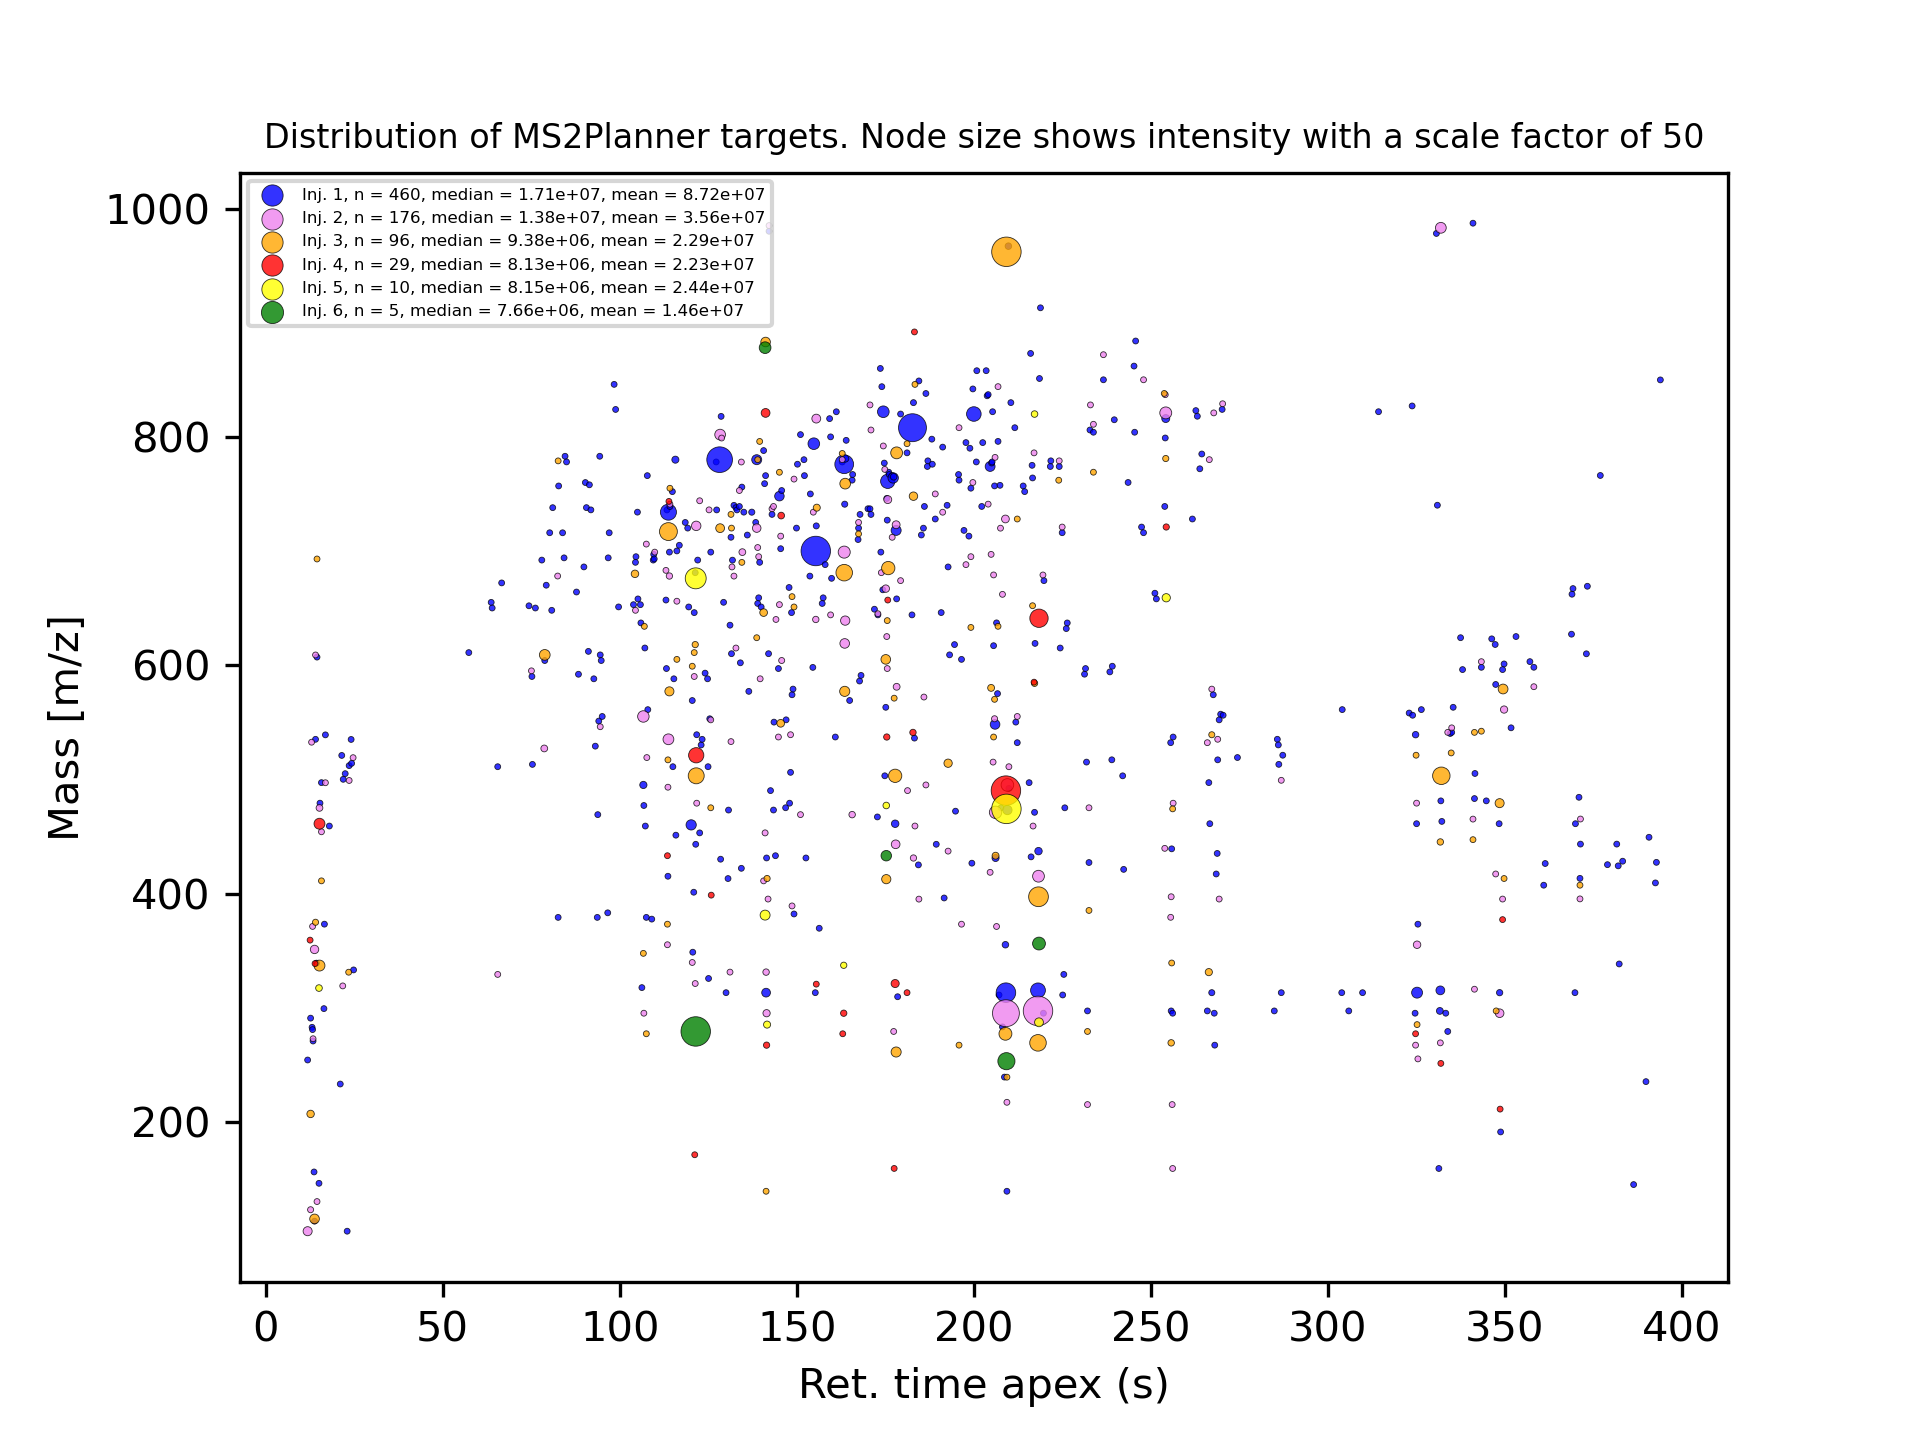

In [25]:
#### RT | m/z
filename = glob.glob('results_targeted_MS2Planner_baseline/plots/*_ALL_plot_mz_rt.png')
Image(filename[0])

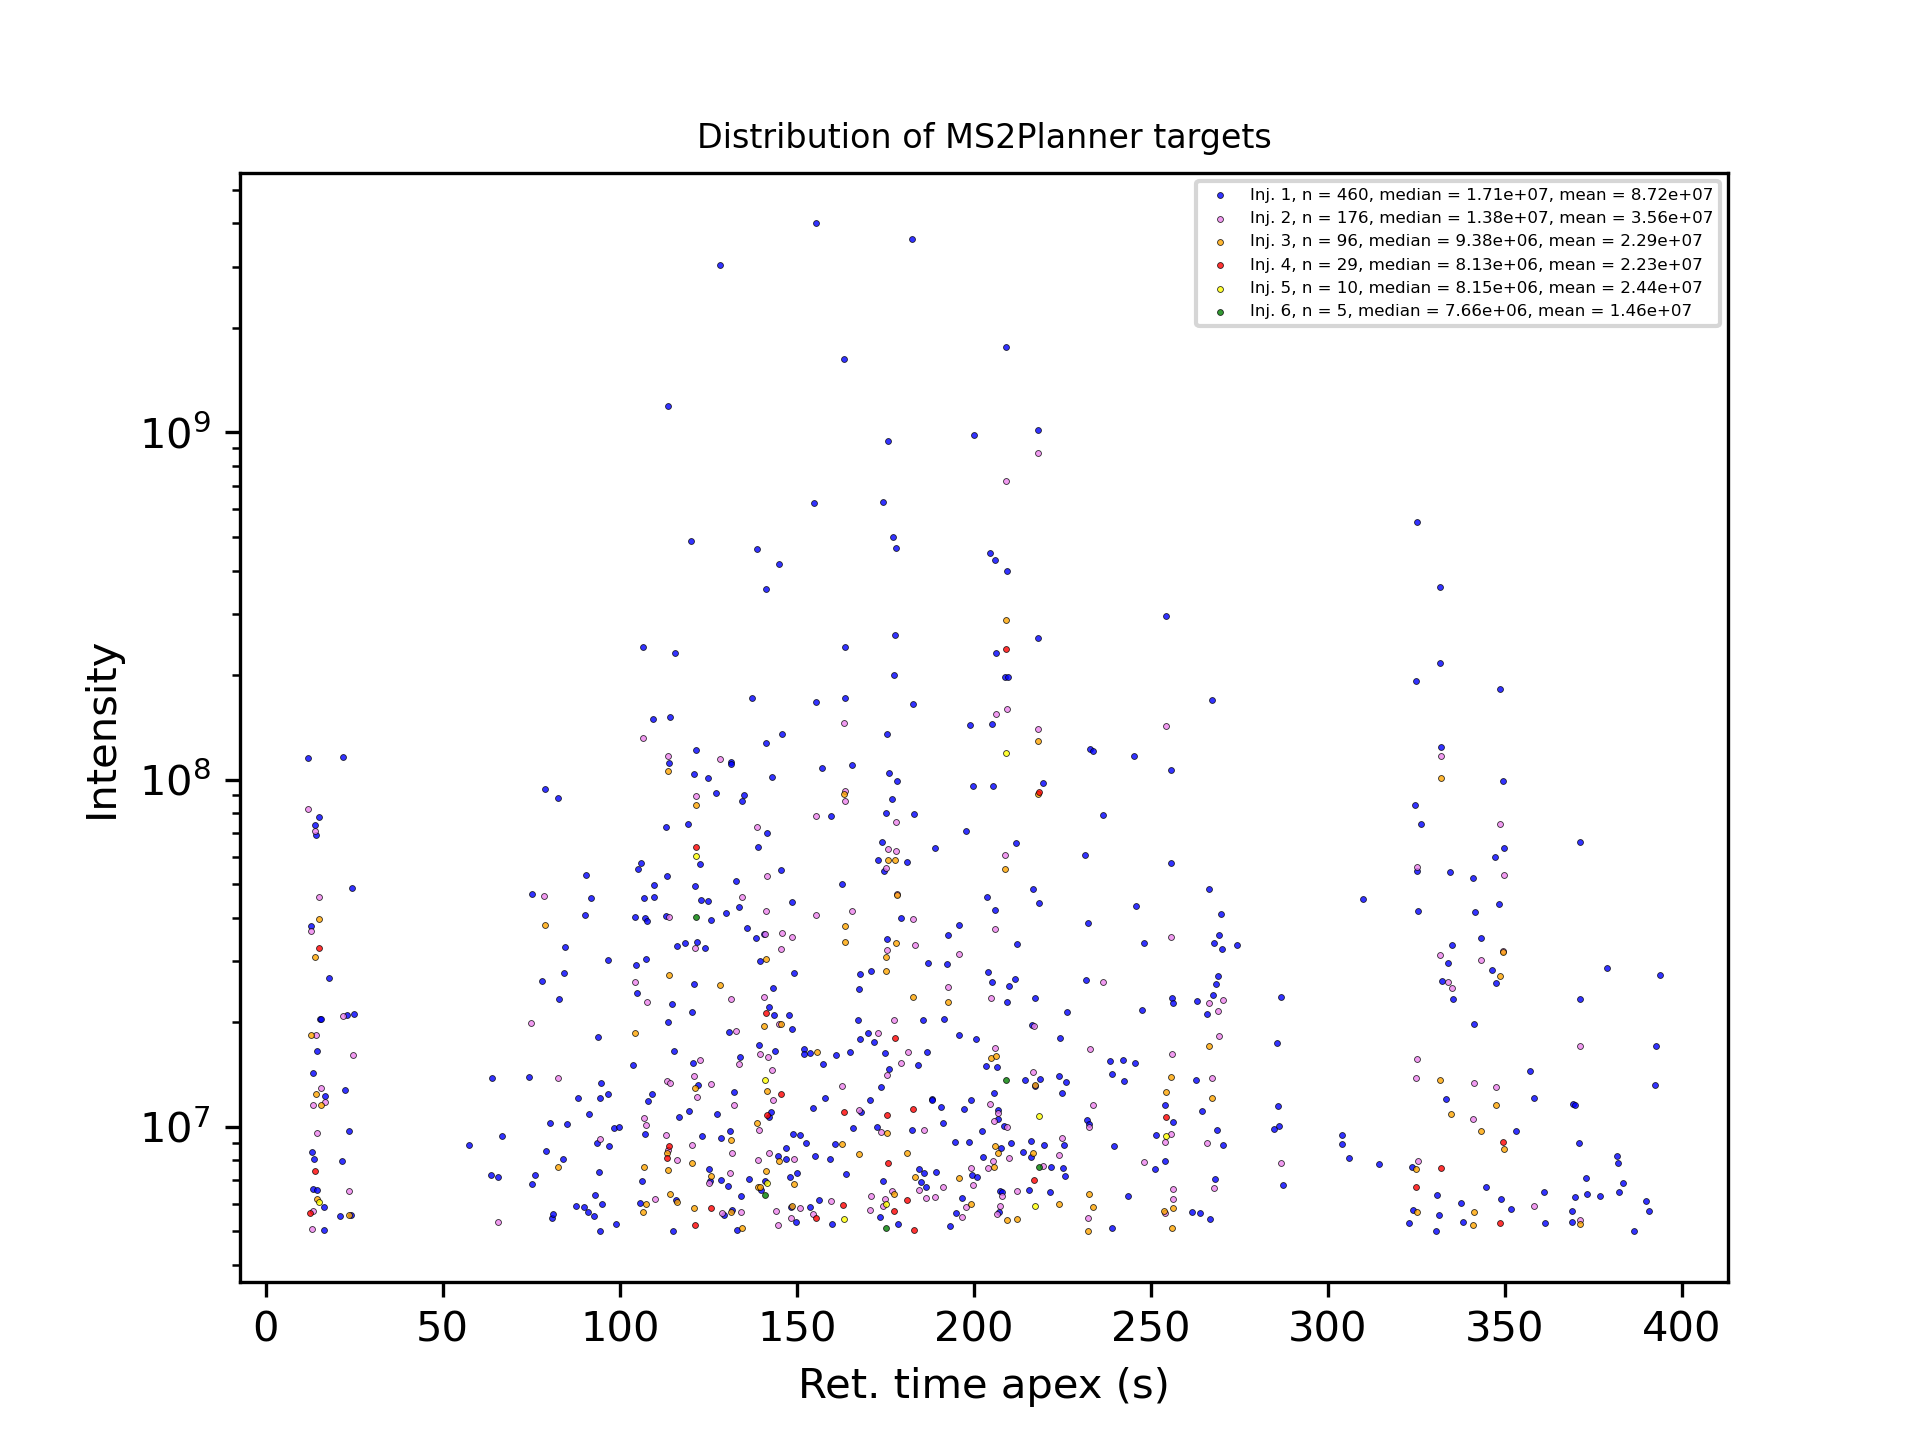

In [26]:
#### RT | int
filename = glob.glob('results_targeted_MS2Planner_baseline/plots/*_ALL_plot_rt_int.png')
Image(filename[0])

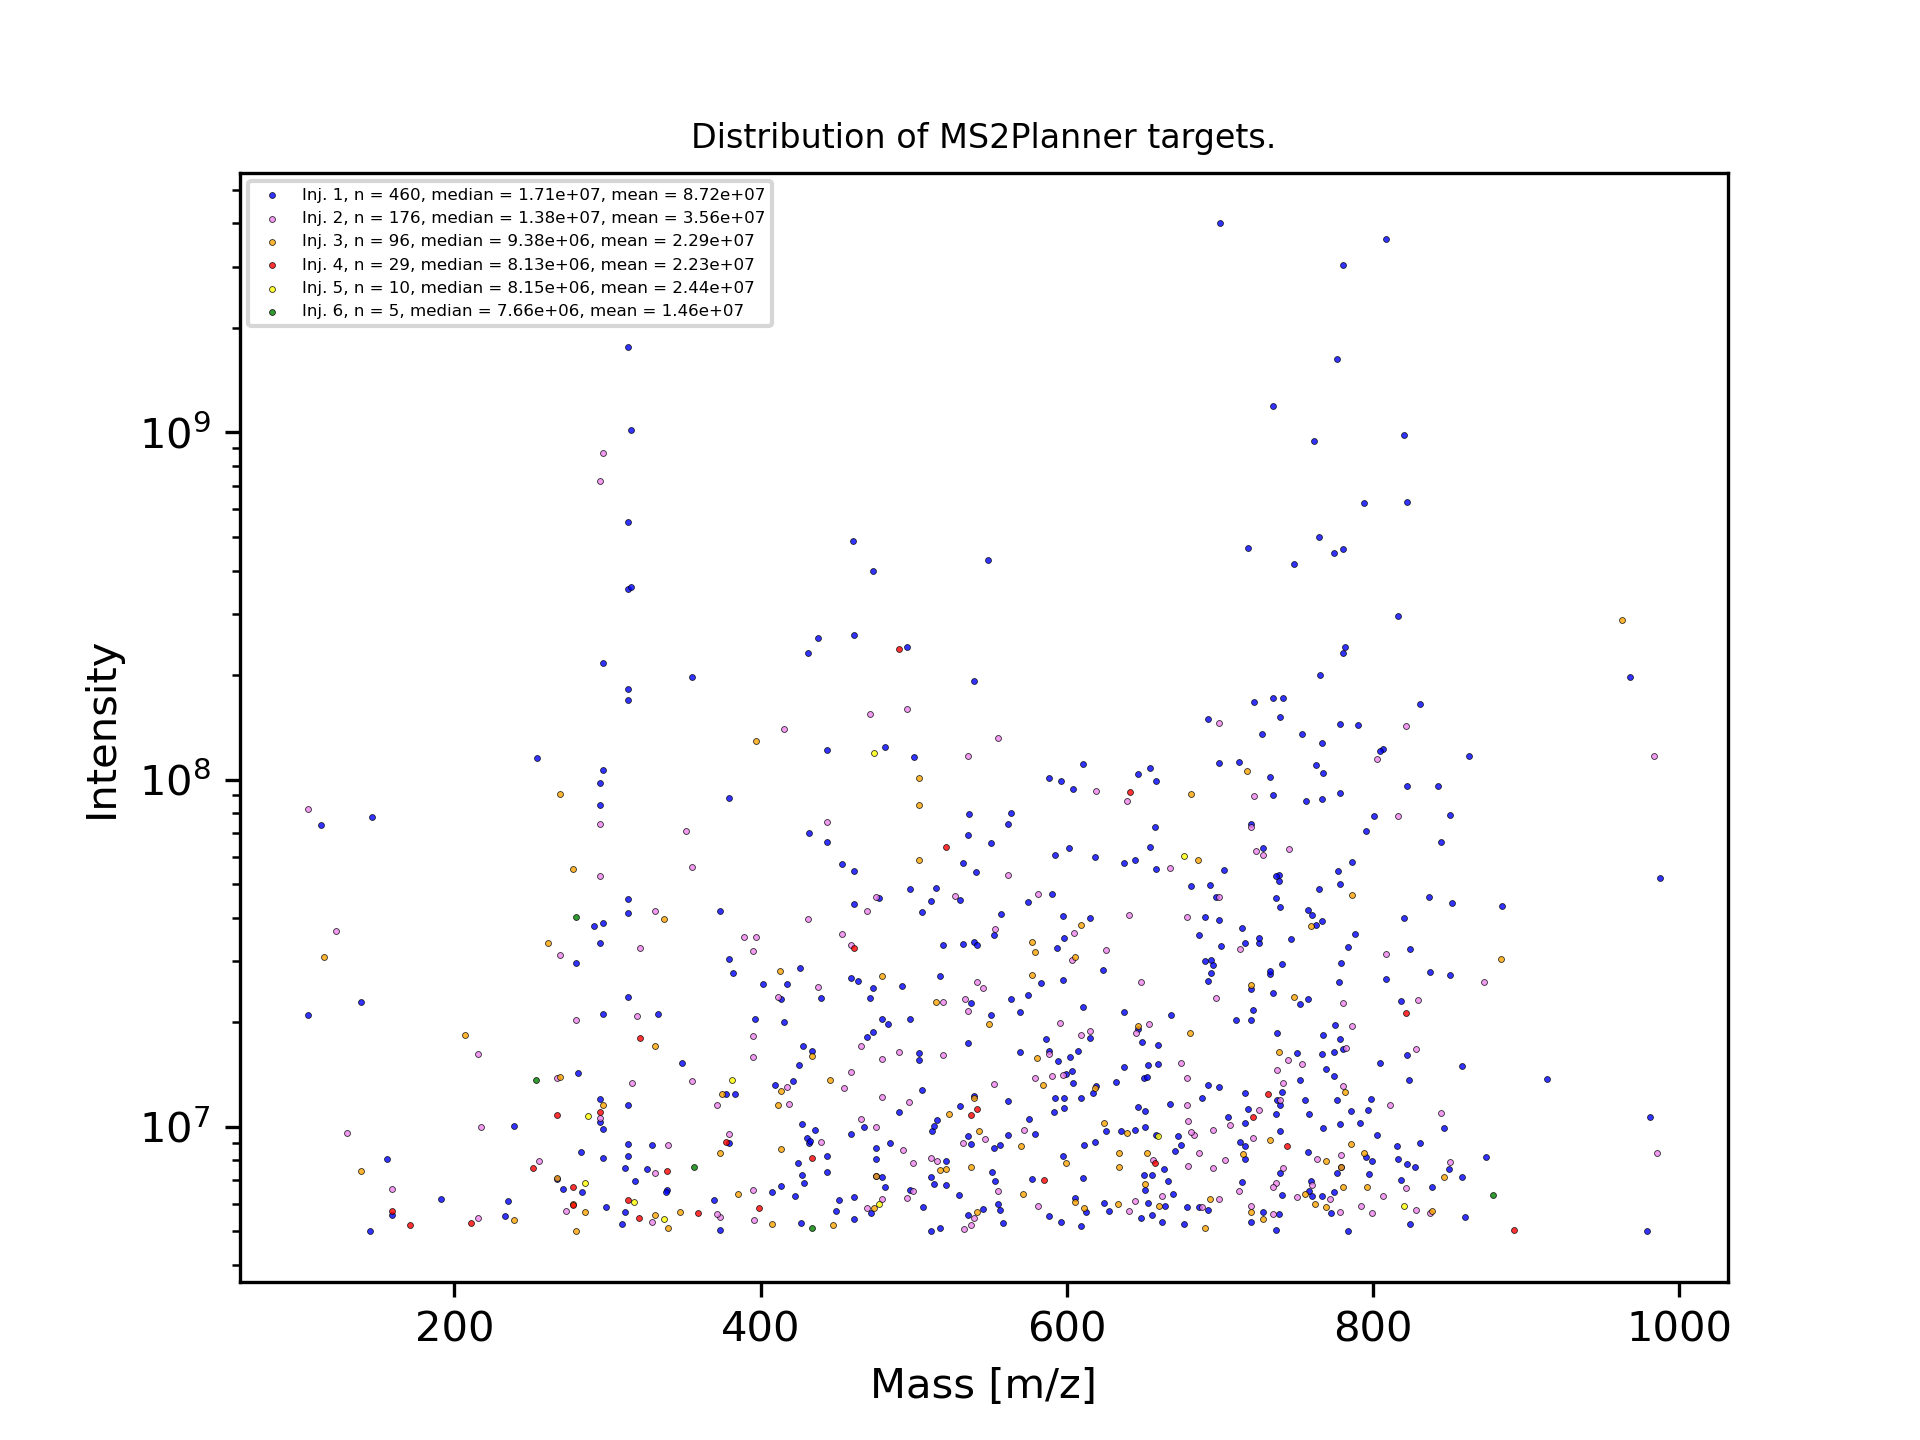

In [27]:
#### m/z | RT
filename = glob.glob('results_targeted_MS2Planner_baseline/plots/*_ALL_plot_mz_int.png')
Image(filename[0])

# MS2Planner in Apex mode

### Prepare Apex mode parameters

In [21]:
# MS2Planner - Shared between Apex and Curve modes
intensity_accumulated = 8e3
min_scan = 0.1
max_scan = 0.2

### Run MS2Planner in Apex mode

This is pretty quick ...

In [11]:
MS2Planner_apex(
    input_file, experiment_number, min_ratio_value, min_intensity_value, 
    intensity_accumulated, isolation, delay, min_scan, max_scan,
    rt_margin, max_same_RT, transient_time,
    polarity,apex_int_percent,pretarget_rt_margin, posttarget_rt_margin)

[I 230329 13:59:43 IODA_MS2Planner_workflow:481] STARTING THE MS2Planner WORKFLOW
[I 230329 13:59:43 IODA_MS2Planner_workflow:489] File path to a mzTab was specified by the user
[I 230329 13:59:43 IODA_MS2Planner_workflow:501] 2023-03-29 13:59:43.862268
[I 230329 13:59:43 IODA_MS2Planner_workflow:503] ======
[I 230329 13:59:43 IODA_MS2Planner_workflow:504] Getting the mzTab
[I 230329 13:59:43 IODA_MS2Planner_workflow:526] This is the input file path: tests/Euphorbia/Targeted/ioda_input/Euphorbia_rogers_latex_Blank_MS1_2uL_to_Euphorbia_rogers_latex_latex_MS1_2uL_mrgd.mzTab
[I 230329 13:59:43 IODA_MS2Planner_workflow:527] This is the output file path: results_targeted_MS2Planner_apex/Euphorbia_rogers_latex_Blank_MS1_2uL_to_Euphorbia_rogers_latex_latex_MS1_2uL_mrgd.csv
[I 230329 13:59:43 IODA_MS2Planner_workflow:531] ======
[I 230329 13:59:43 IODA_MS2Planner_workflow:532] Converting to intermediate table format ...
[I 230329 13:59:43 IODA_MS2Planner_workflow:142] - For sample Euphorbia_ro

Input file is an mzTab


[I 230329 13:59:44 IODA_MS2Planner_workflow:600] ======
[I 230329 13:59:44 IODA_MS2Planner_workflow:604] 2023-03-29 13:59:44,418 - MS2Planner - INFO - =============
    2023-03-29 13:59:44,418 - MS2Planner - INFO - Apex mode begin
    2023-03-29 13:59:44,418 - MS2Planner - INFO - =============
    2023-03-29 13:59:44,418 - MS2Planner - INFO - File Read
    2023-03-29 13:59:44,418 - MS2Planner - INFO - =============
    2023-03-29 13:59:44,418 - MS2Planner - INFO - Begin Finding Path
    2023-03-29 13:59:44,418 - MS2Planner - INFO - =============
    2023-03-29 13:59:44,424 - MS2Planner.apex - INFO - [1/15 max]: features: 525, rest: 776
    2023-03-29 13:59:44,425 - MS2Planner.apex - INFO - [2/15 max]: features: 169, rest: 251
    2023-03-29 13:59:44,426 - MS2Planner.apex - INFO - [3/15 max]: features: 82, rest: 82
    2023-03-29 13:59:44,426 - MS2Planner - INFO - Paths Generated
    2023-03-29 13:59:44,426 - MS2Planner - INFO - =============
    2023-03-29 13:59:44,429 - MS2Planner - I

### Visualization - **Apex mode results**

### Examine the results

**Visualise** : Run the cell below to show the scatter plot for the IODA-targeted workflow results. Valid targets in the reference sample are represented into experiment(s). The ion/features from the blank sample are also shown. Verify that the feature detection parameter variables and IODA-targeted workflows are adapted to level you want to apply, and your sample(s) complexity.

- Examine the IODA-targeted worflow log and the plots in order to verify that the 'min_intensity' parameter is adapted to exclusion level you want to apply, and your sample(s) complexity.
- Note that, at this stage, it cannot be evaluated if ion detection was done optimally. This should be examinated during the generation of the feature table or the mzTab file (such as with TOPPAS/OpenMS).

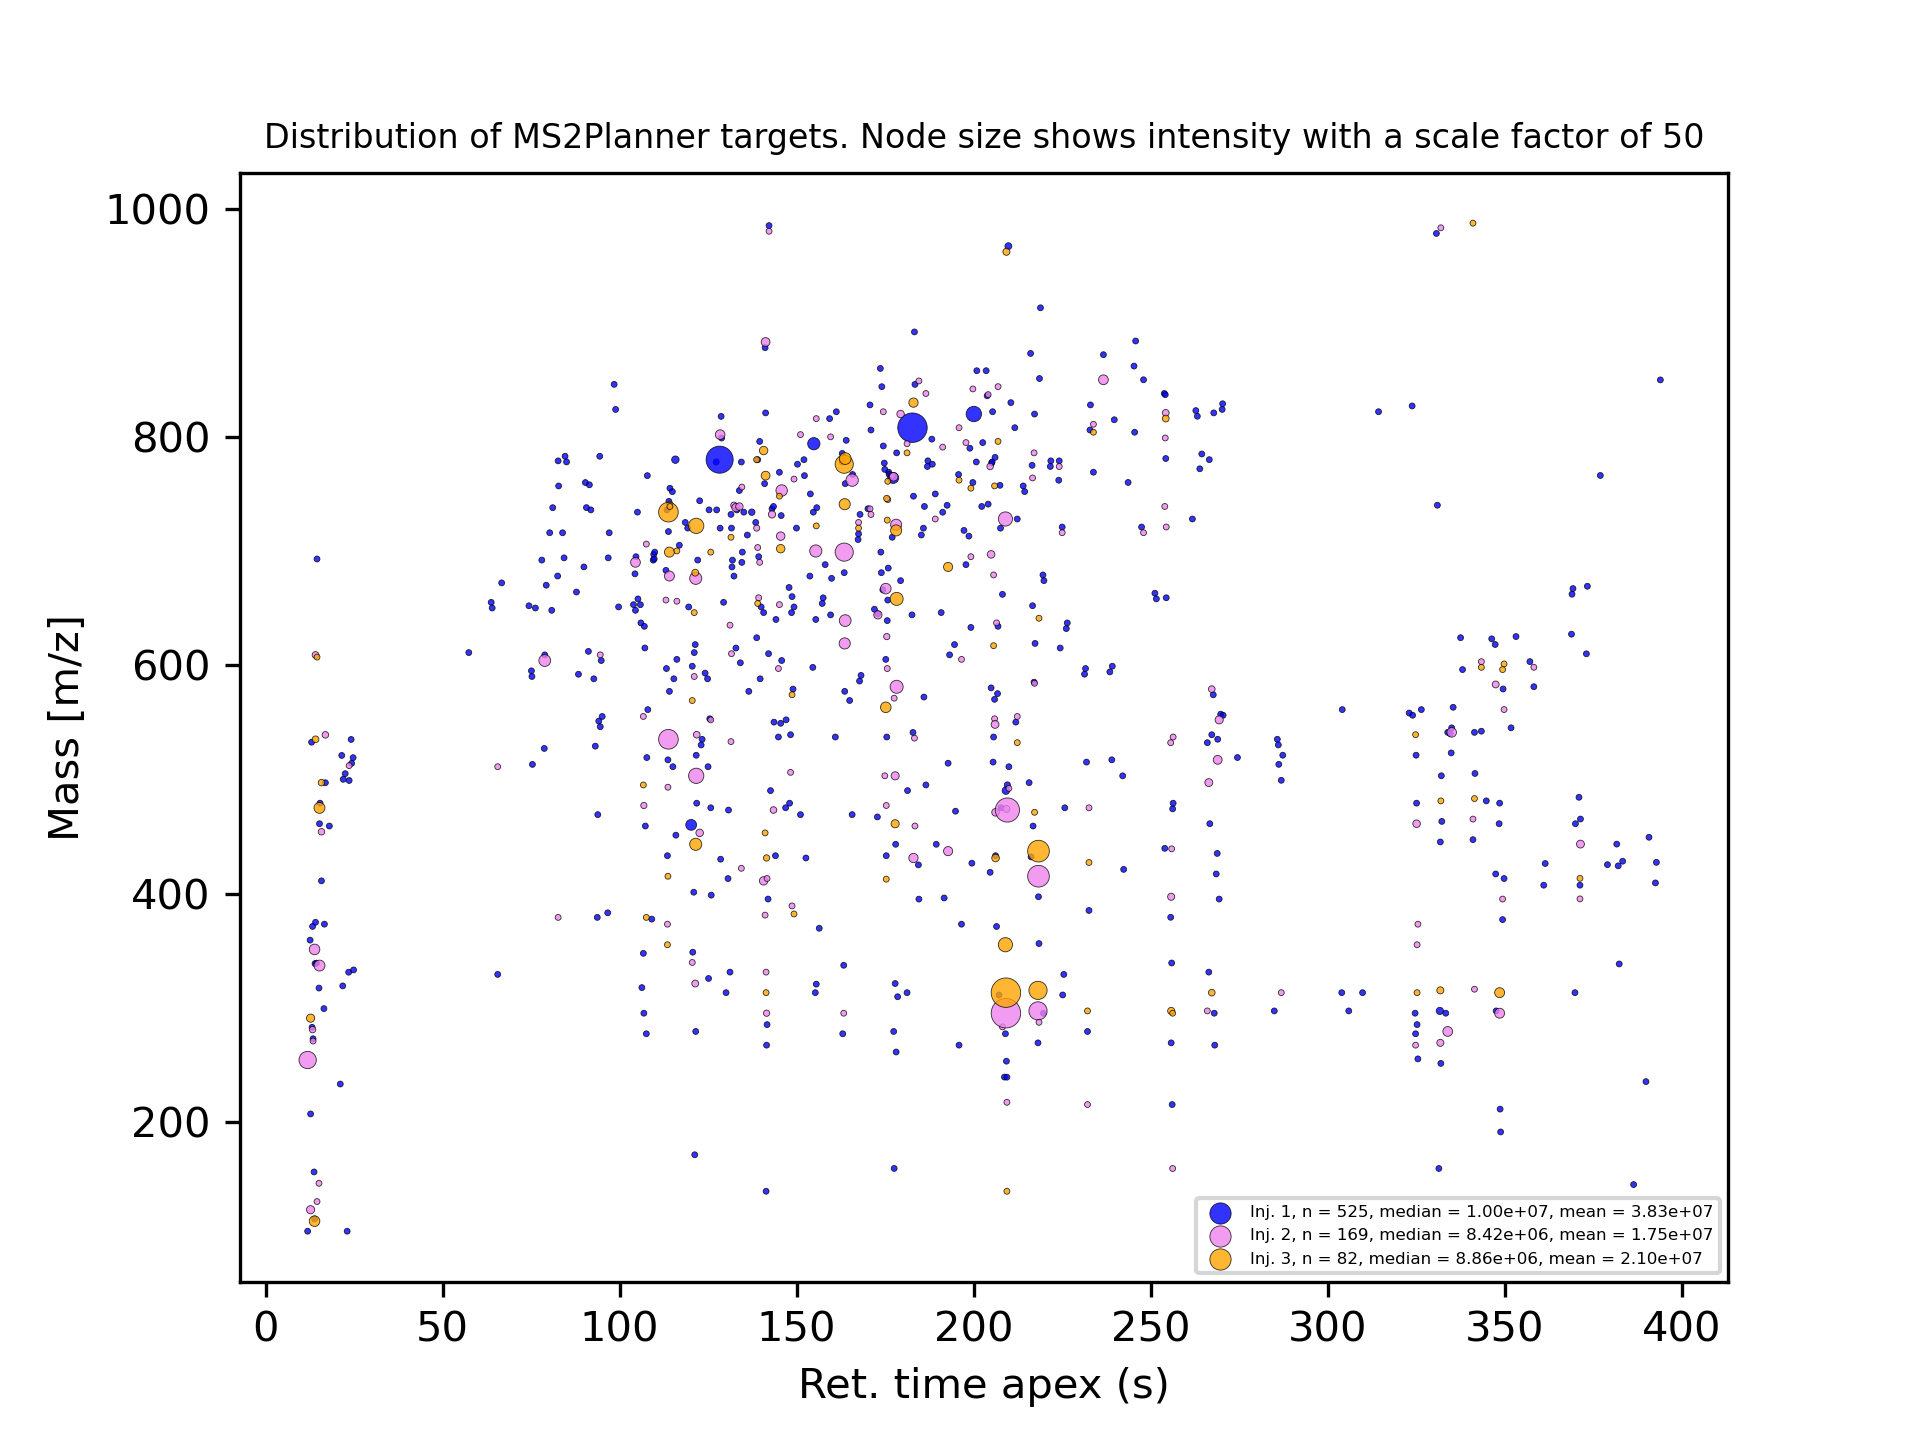

In [22]:
#### RT | m/z
filename = glob.glob('results_targeted_MS2Planner_apex/plots/*_ALL_plot_mz_rt.png')
Image(filename[0])

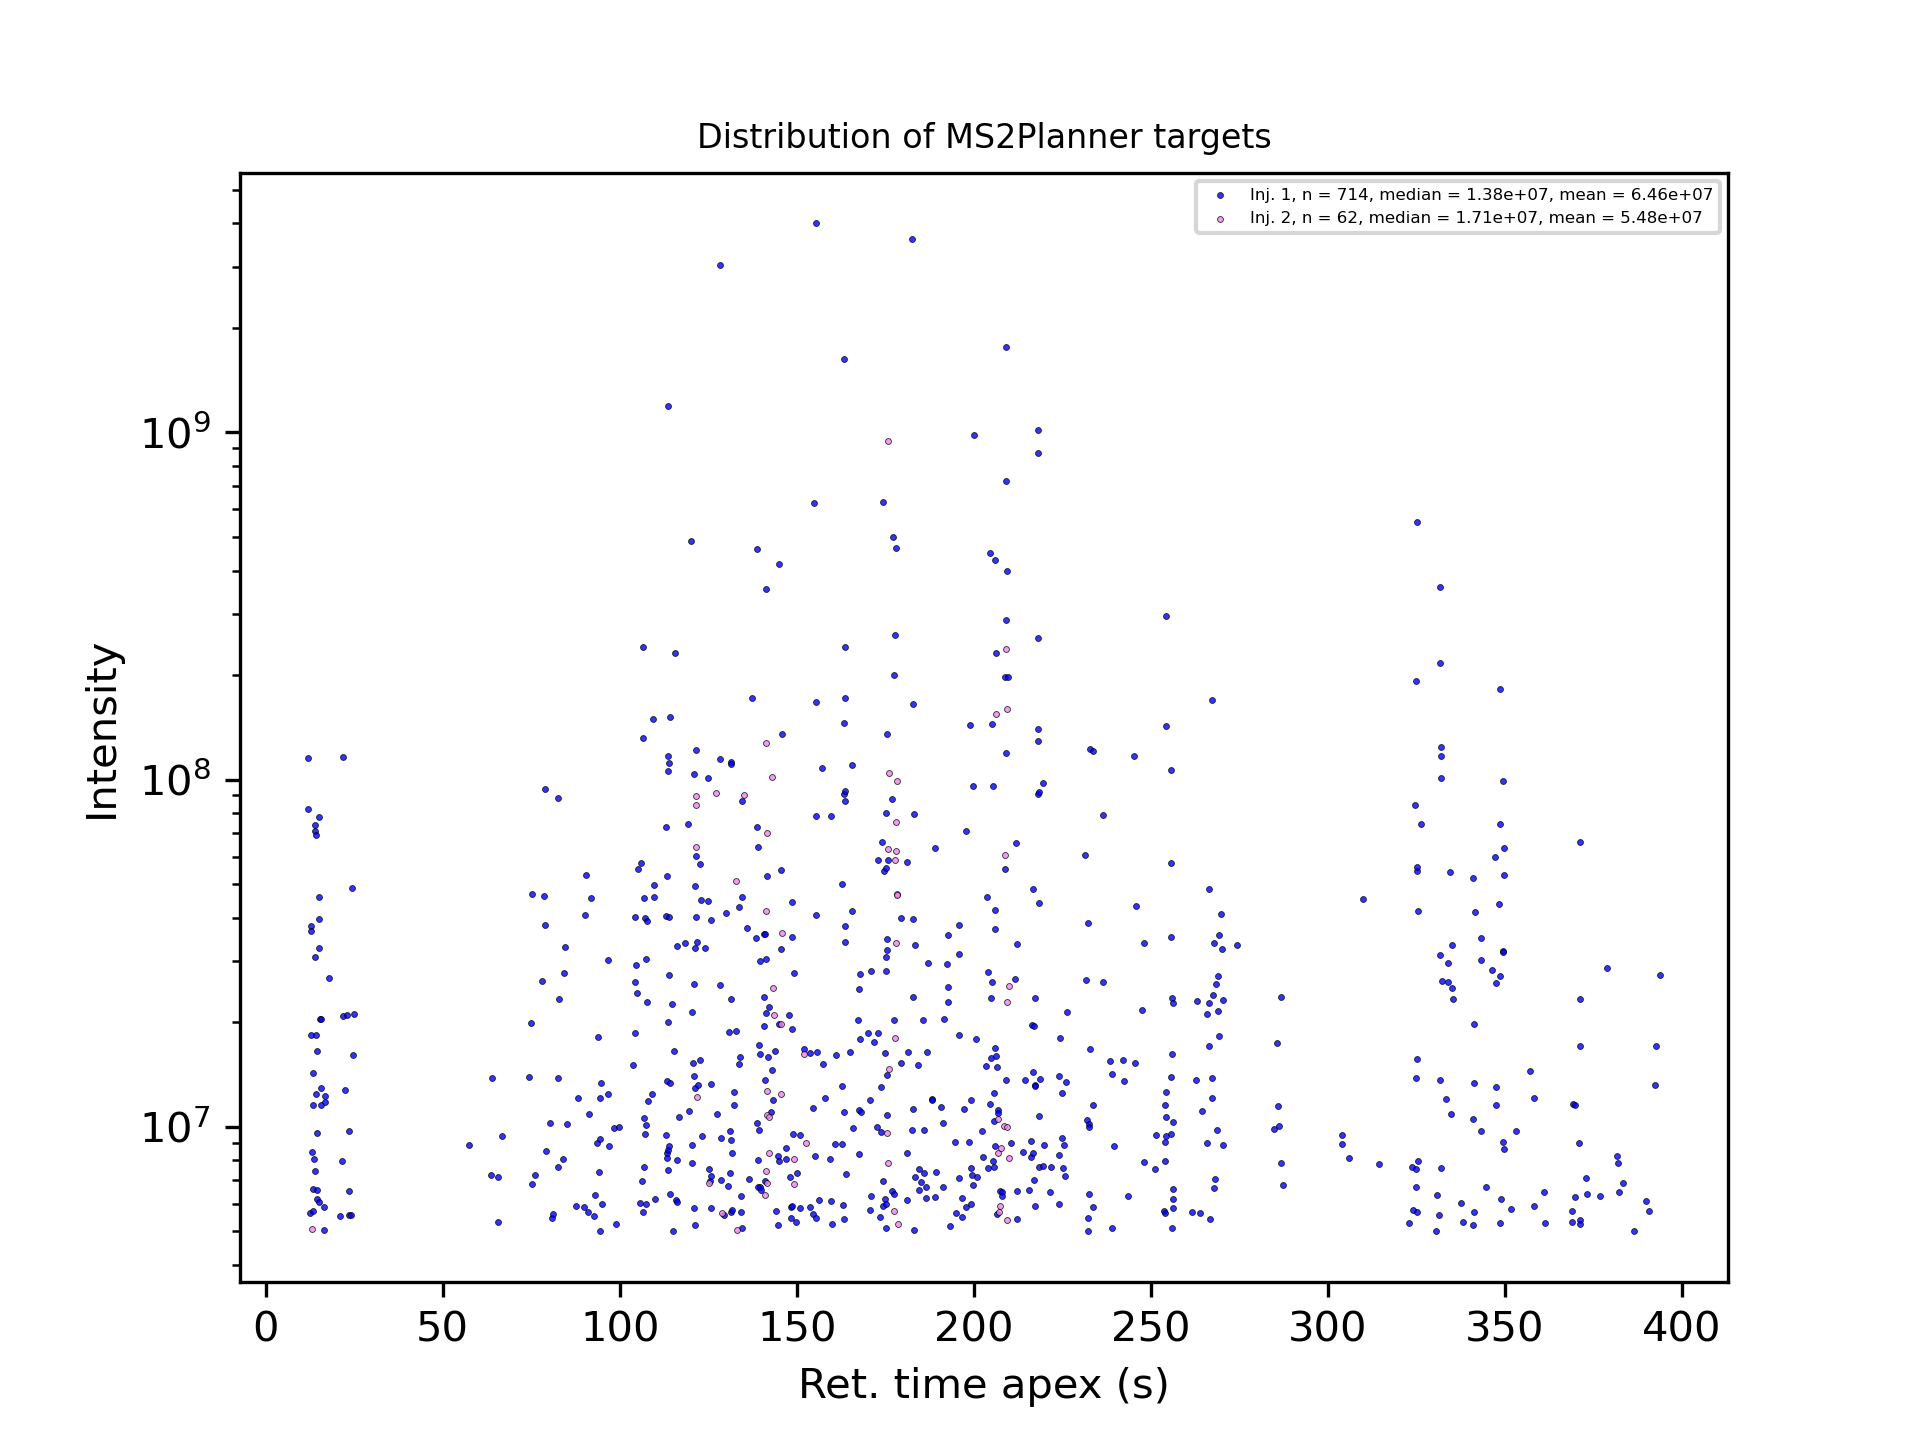

In [23]:
#### RT | int
filename = glob.glob('results_targeted_MS2Planner_curve/plots/*_ALL_plot_rt_int.png')
Image(filename[0])

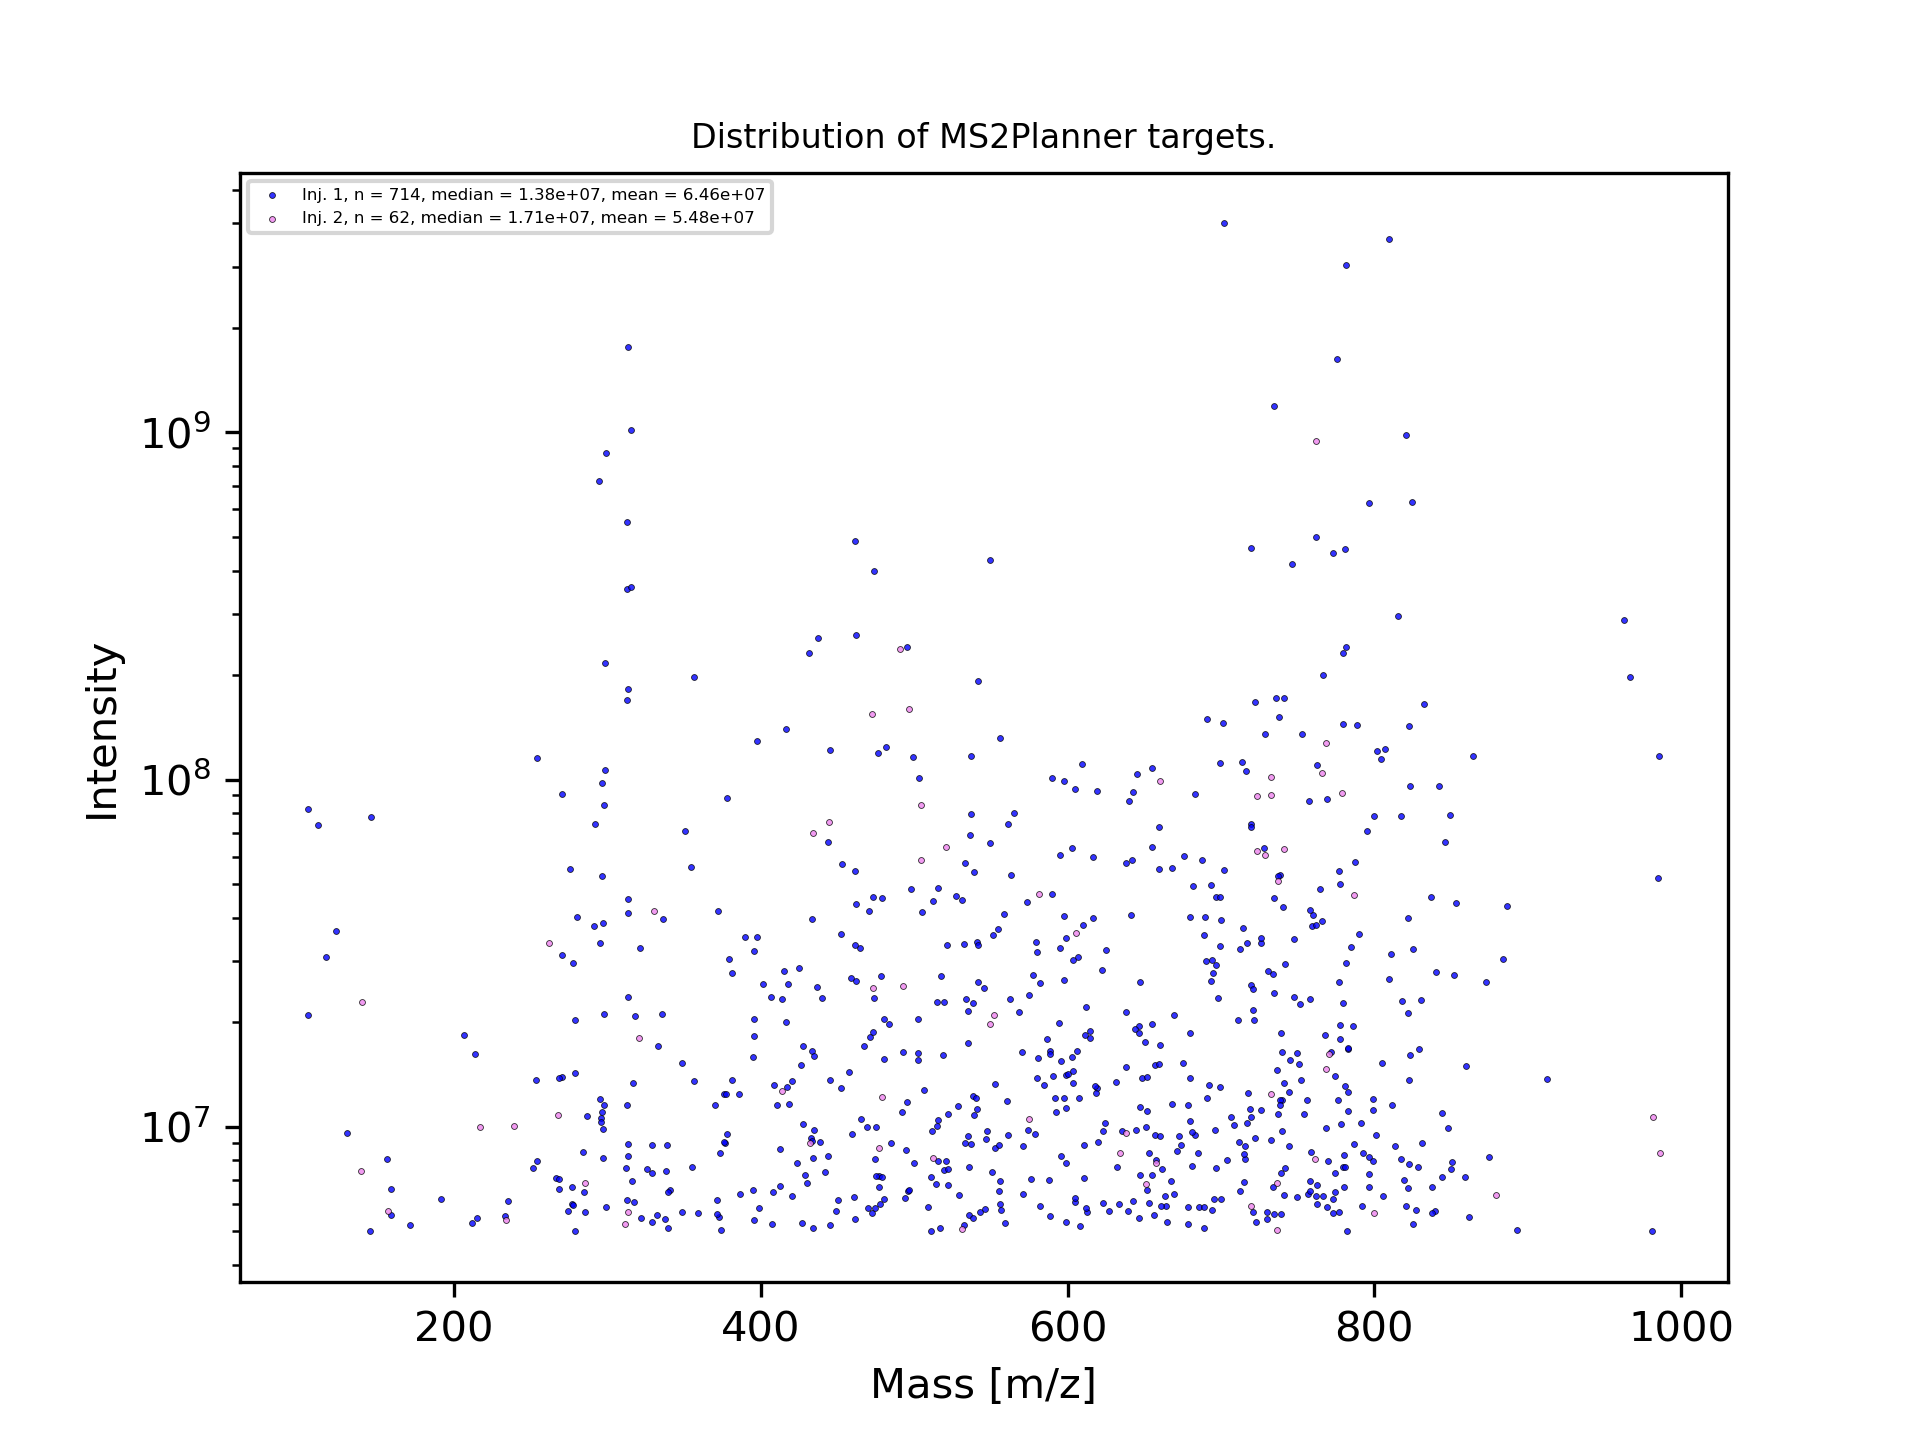

In [24]:
#### m/z | RT
filename = glob.glob('results_targeted_MS2Planner_curve/plots/*_ALL_plot_mz_int.png')
Image(filename[0])

### Download the results

Download the IODA-targeted workflow results ->
[download_results_targeted_MS2Planner_apex/IODA_MS2Planner_curve_apex.zip](download_results_targeted_MS2Planner_apex/IODA_MS2Planner_curve_apex.zip?download=1).

### Prepare your IODA experiment
Prepare the iterative mass spectrometry acquisition. For instructions on how to load and configure an exclusion list with XCalibur or MaxQuant.Live please refer to [the following documentation](nothing).

# MS2Planner in Curve mode

This mode should be the most the perfomant.

### Prepare Curve mode parameters

In [13]:
#CURVE MODE PARAMETERS
rt_tolerance_curve = 3 #secs
mz_tolerance_curve = 5 #m/z
restriction = 2
cluster = 'kNN'

### Run MS2Planner in Curve mode

This can take several minutes. The amount of RAM can reach 10-16 GB depending on the number of features and mass spec data.

In [14]:
MS2Planner_curve(input_file, experiment_number, min_ratio_value,
                    min_intensity_value, input_file_curve, 
                    intensity_accumulated, 
                    rt_tolerance_curve, mz_tolerance_curve, 
                    isolation, delay, min_scan, max_scan, cluster, 
                    rt_margin, transient_time, max_same_RT, 
                    apex_int_percent, polarity, 
                    pretarget_rt_margin, posttarget_rt_margin
                    #RF_base_value=70, CEs=['20,35,50']
                    )

[I 230329 13:59:46 IODA_MS2Planner_workflow:682] STARTING THE MS2Planner WORKFLOW
[I 230329 13:59:46 IODA_MS2Planner_workflow:690] File path to a mzTab was specified by the user
[I 230329 13:59:46 IODA_MS2Planner_workflow:702] 2023-03-29 13:59:46.830166
[I 230329 13:59:46 IODA_MS2Planner_workflow:704] ======
[I 230329 13:59:46 IODA_MS2Planner_workflow:705] Getting the mzTab
[I 230329 13:59:46 IODA_MS2Planner_workflow:727] This is the input file path: tests/Euphorbia/Targeted/ioda_input/Euphorbia_rogers_latex_Blank_MS1_2uL_to_Euphorbia_rogers_latex_latex_MS1_2uL_mrgd.mzTab
[I 230329 13:59:46 IODA_MS2Planner_workflow:728] This is the output file path: results_targeted_MS2Planner_curve/Euphorbia_rogers_latex_Blank_MS1_2uL_to_Euphorbia_rogers_latex_latex_MS1_2uL_mrgd.csv
[I 230329 13:59:46 IODA_MS2Planner_workflow:732] ======
[I 230329 13:59:46 IODA_MS2Planner_workflow:733] Converting to intermediate table format ...
[I 230329 13:59:46 IODA_MS2Planner_workflow:142] - For sample Euphorbia_r

Input file is an mzTab
Start GenPath for each path
====== New path processed
EdgeCreate
AddPrimeNode
addEdge
shortestPath
PathExtraction
ClusterRemove
====== New path processed
EdgeCreate
AddPrimeNode
addEdge
shortestPath


[I 230329 14:00:17 IODA_MS2Planner_workflow:806] ======
[I 230329 14:00:17 IODA_MS2Planner_workflow:810] 2023-03-29 13:59:47,274 - MS2Planner - INFO - =============
    2023-03-29 13:59:47,274 - MS2Planner - INFO - Curve mode begin
    2023-03-29 13:59:47,274 - MS2Planner - INFO - restriction: (3.0000, 5.0000)
    2023-03-29 13:59:50,936 - MS2Planner.curve - INFO - =============
    2023-03-29 13:59:50,936 - MS2Planner.curve - INFO - File Read
    2023-03-29 13:59:50,936 - MS2Planner.curve - INFO - =============
    2023-03-29 13:59:57,863 - MS2Planner.curve - INFO - Begin Finding Path
    2023-03-29 13:59:57,863 - MS2Planner.curve - INFO - =============
    2023-03-29 14:00:16,219 - MS2Planner.curve - INFO - [1/15]: features: 714, rest: 776
    2023-03-29 14:00:17,036 - MS2Planner.curve - INFO - [2/15]: features: 62, rest: 62
    2023-03-29 14:00:17,080 - MS2Planner - INFO - File Written
    2023-03-29 14:00:17,080 - MS2Planner - INFO - =============
    
[I 230329 14:00:17 IODA_MS2Pl

PathExtraction
ClusterRemove
====== New path processed
EdgeCreate
AddPrimeNode
addEdge
shortestPath


[I 230329 14:00:18 IODA_MS2Planner_workflow:229] Cleaning and zipping workflow results files ...
[I 230329 14:00:18 IODA_MS2Planner_workflow:184] All files zipped successfully!
[I 230329 14:00:18 IODA_MS2Planner_workflow:261] ======
[I 230329 14:00:18 IODA_MS2Planner_workflow:262] END OF THE MS2Planner WORKFLOW - curve mode
[I 230329 14:00:18 IODA_MS2Planner_workflow:263] ======


### Visualization - **Curve mode results**

### Examine the results

**Visualise** : Run the cell below to show the scatter plot for the IODA-targeted workflow results. Valid targets in the reference sample are represented into experiment(s). The ion/features from the blank sample are also shown. Verify that the feature detection parameter variables and IODA-targeted workflows are adapted to level you want to apply, and your sample(s) complexity.

- Examine the IODA-targeted worflow log and the plots in order to verify that the 'min_intensity' parameter is adapted to exclusion level you want to apply, and your sample(s) complexity.
- Note that, at this stage, it cannot be evaluated if ion detection was done optimally. This should be examinated during the generation of the feature table or the mzTab file (such as with TOPPAS/OpenMS).

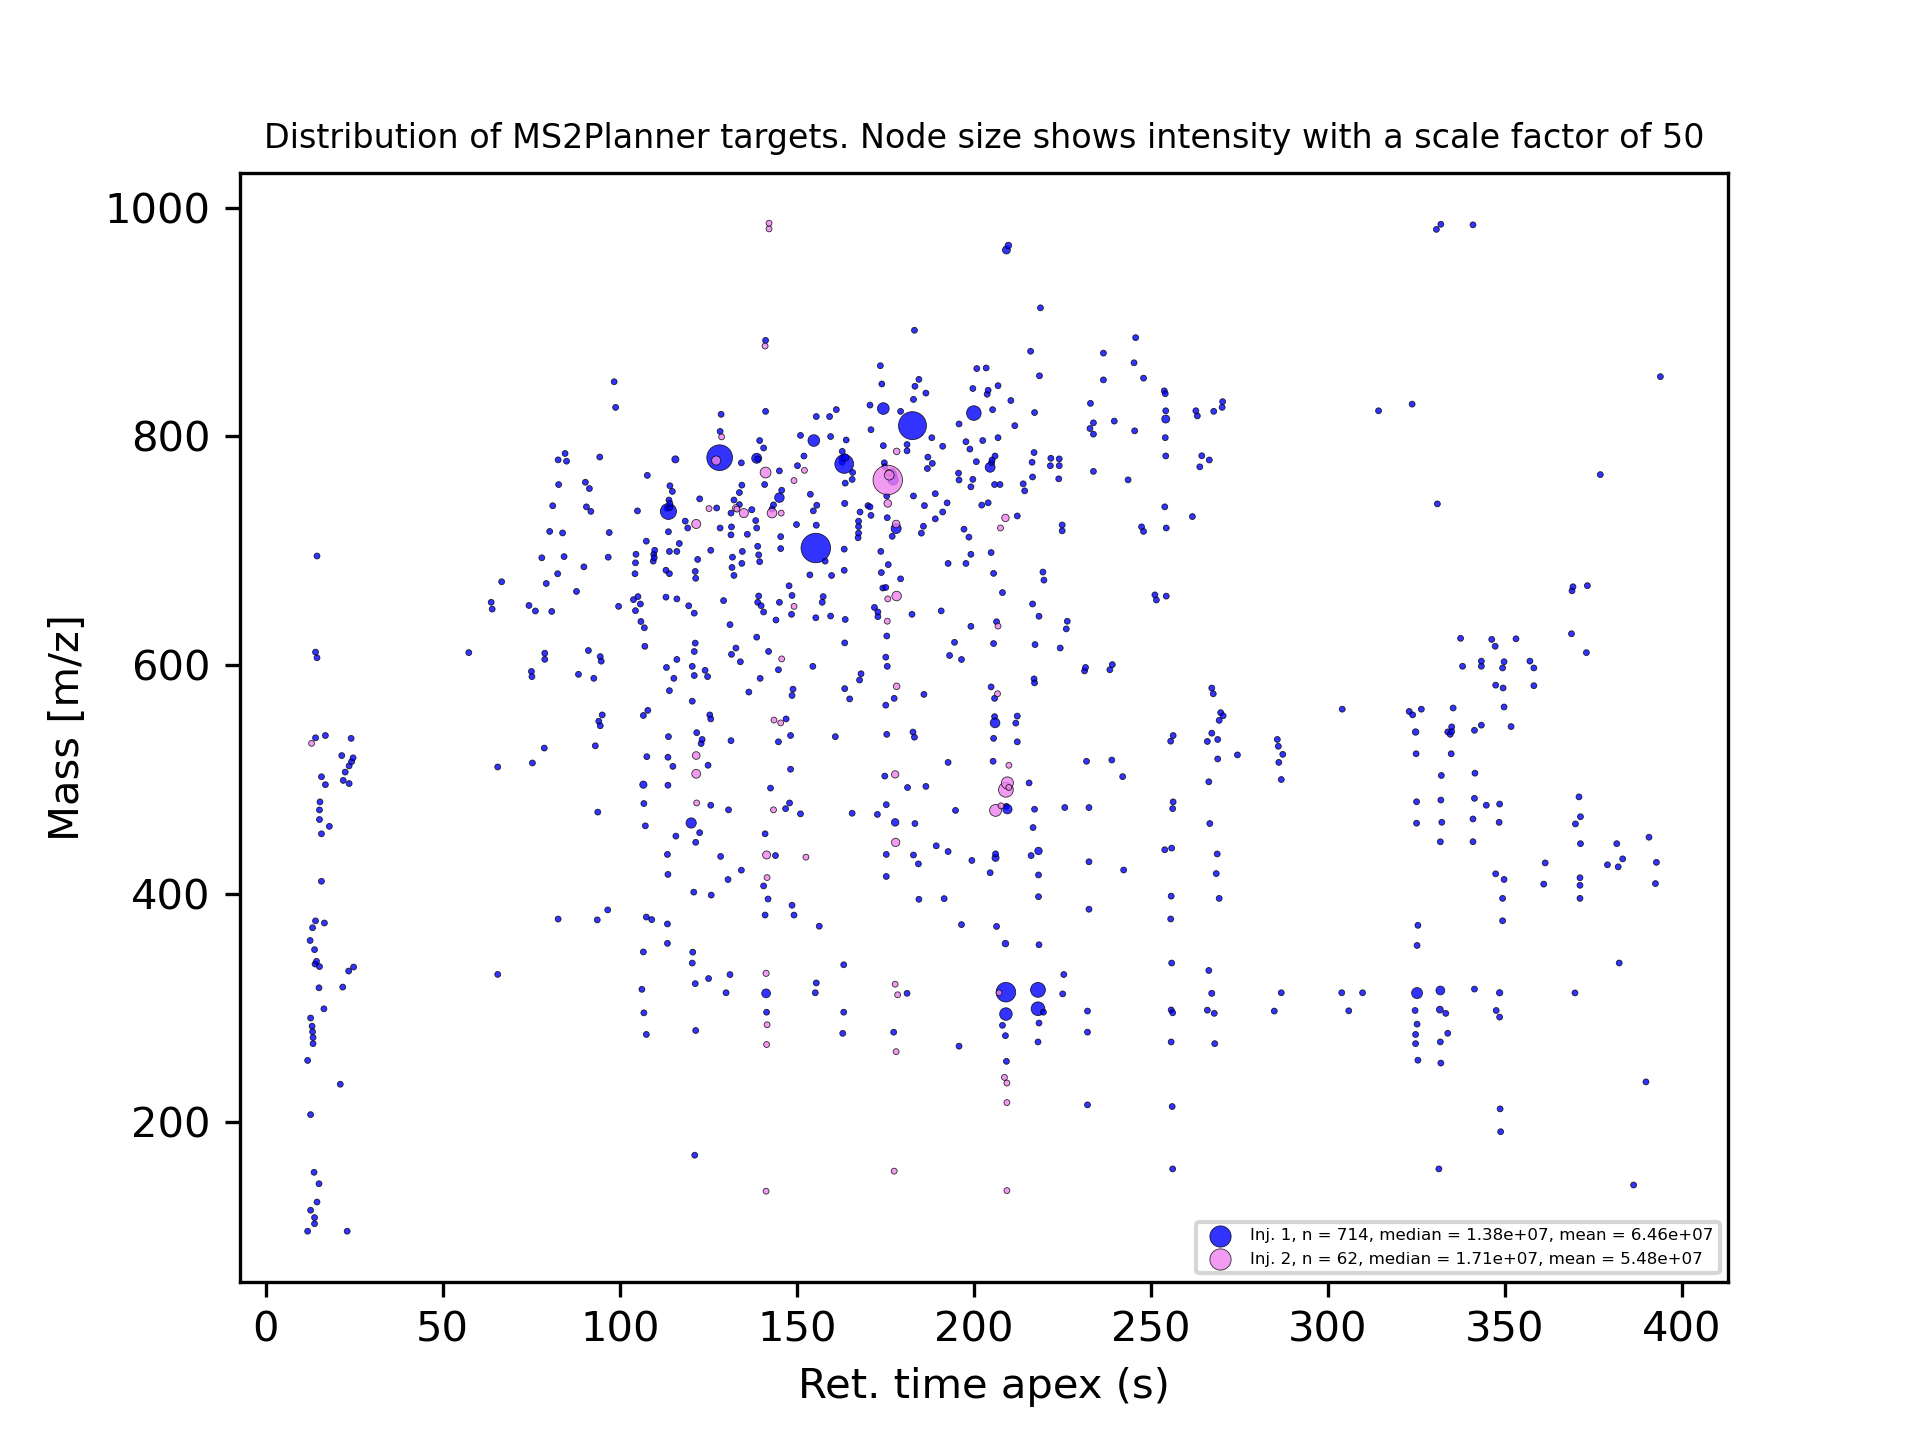

In [18]:
#### RT | m/z
filename = glob.glob('results_targeted_MS2Planner_curve/plots/*_ALL_plot_mz_rt.png')
Image(filename[0])

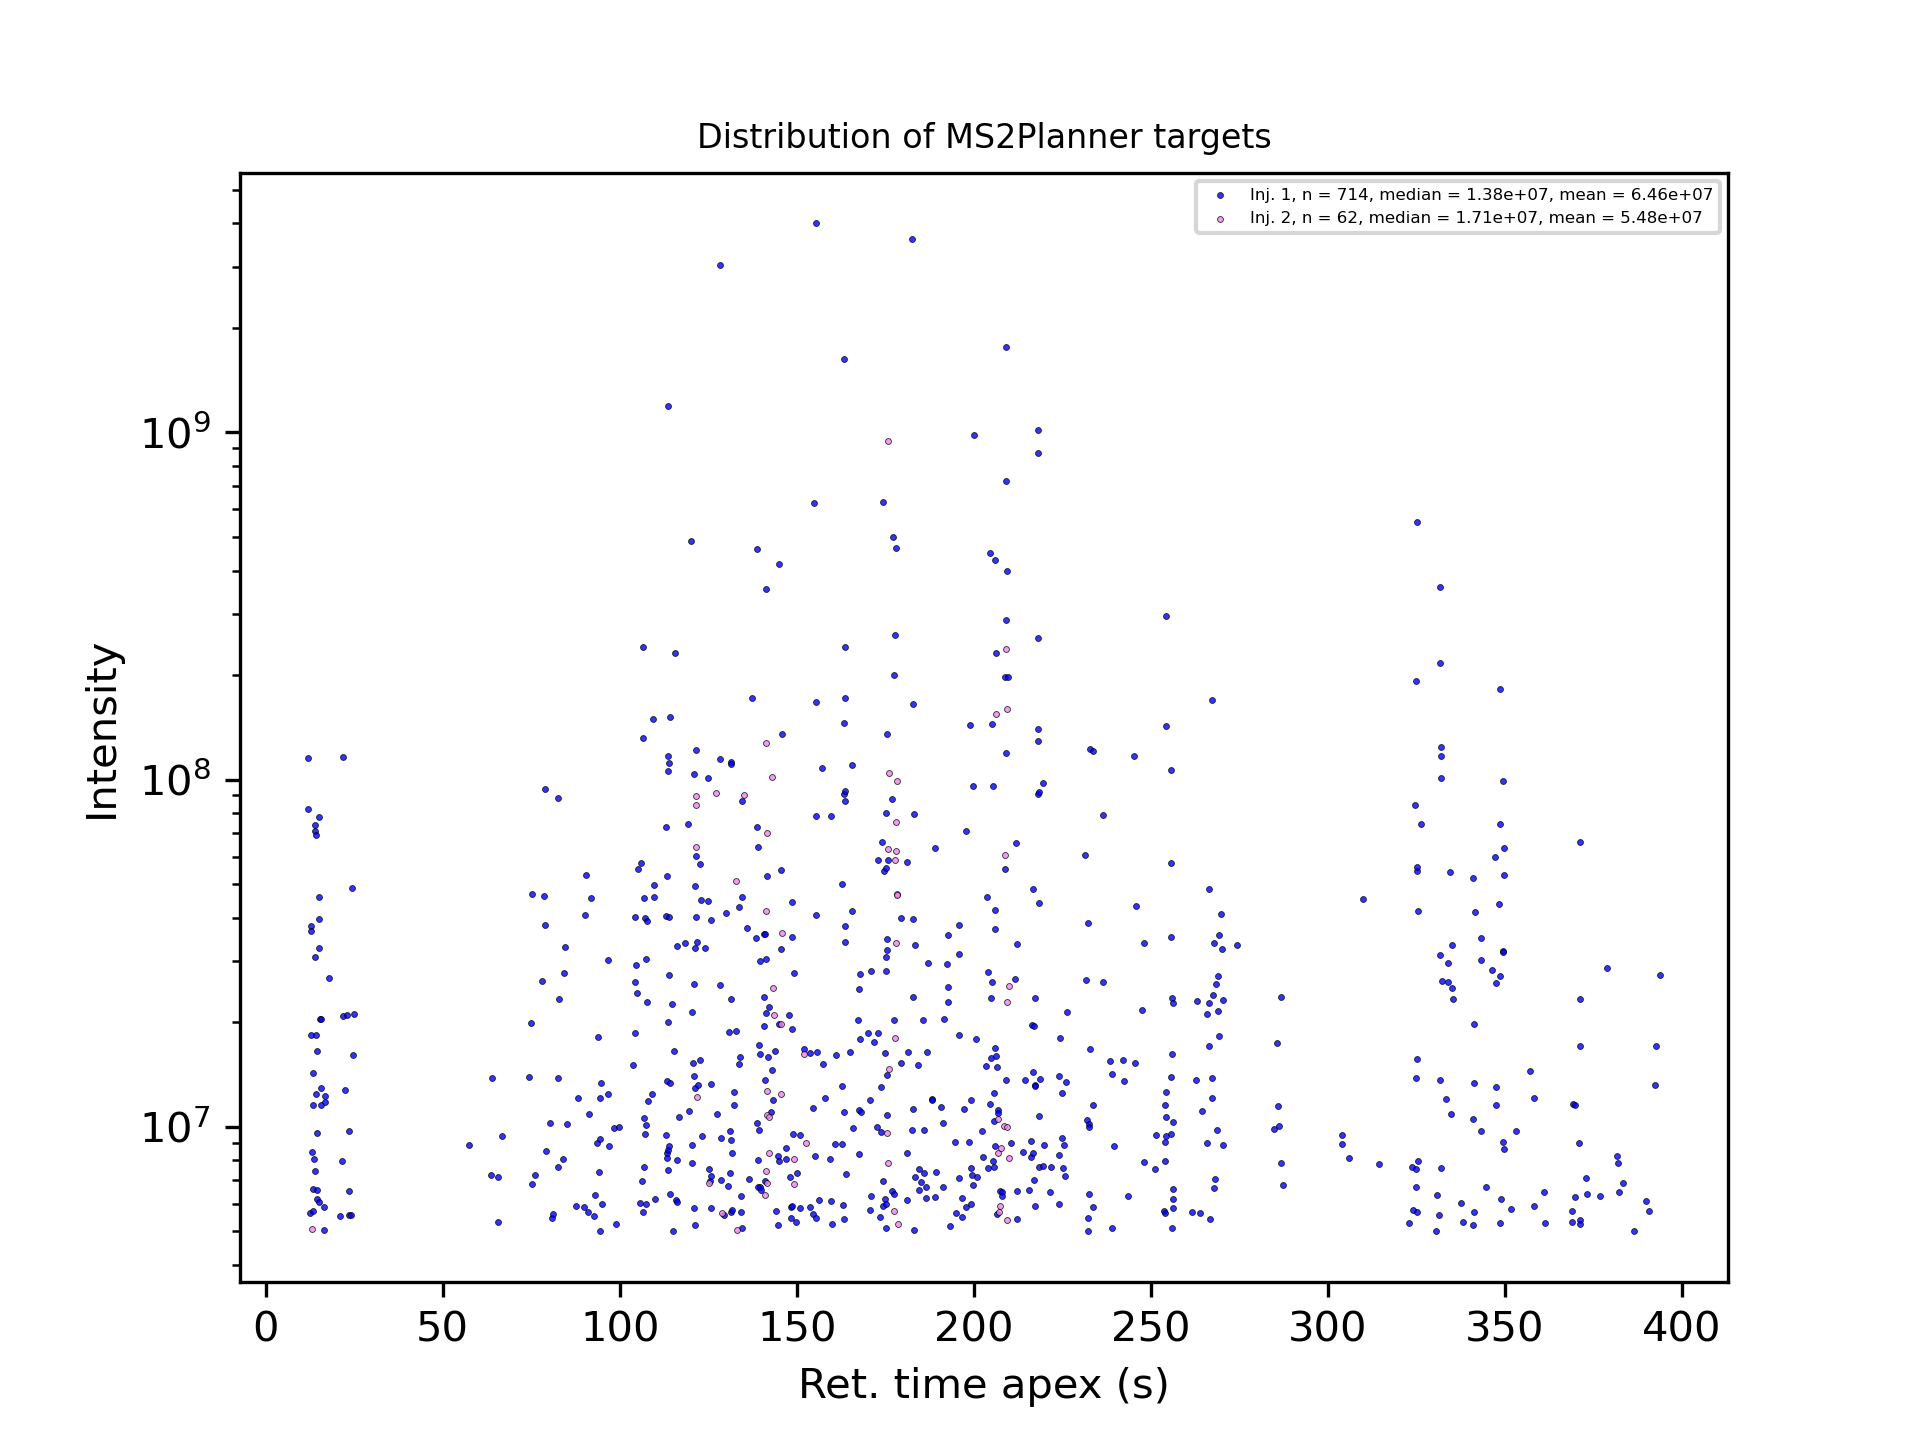

In [19]:
#### RT | int
filename = glob.glob('results_targeted_MS2Planner_curve/plots/*_ALL_plot_rt_int.png')
Image(filename[0])

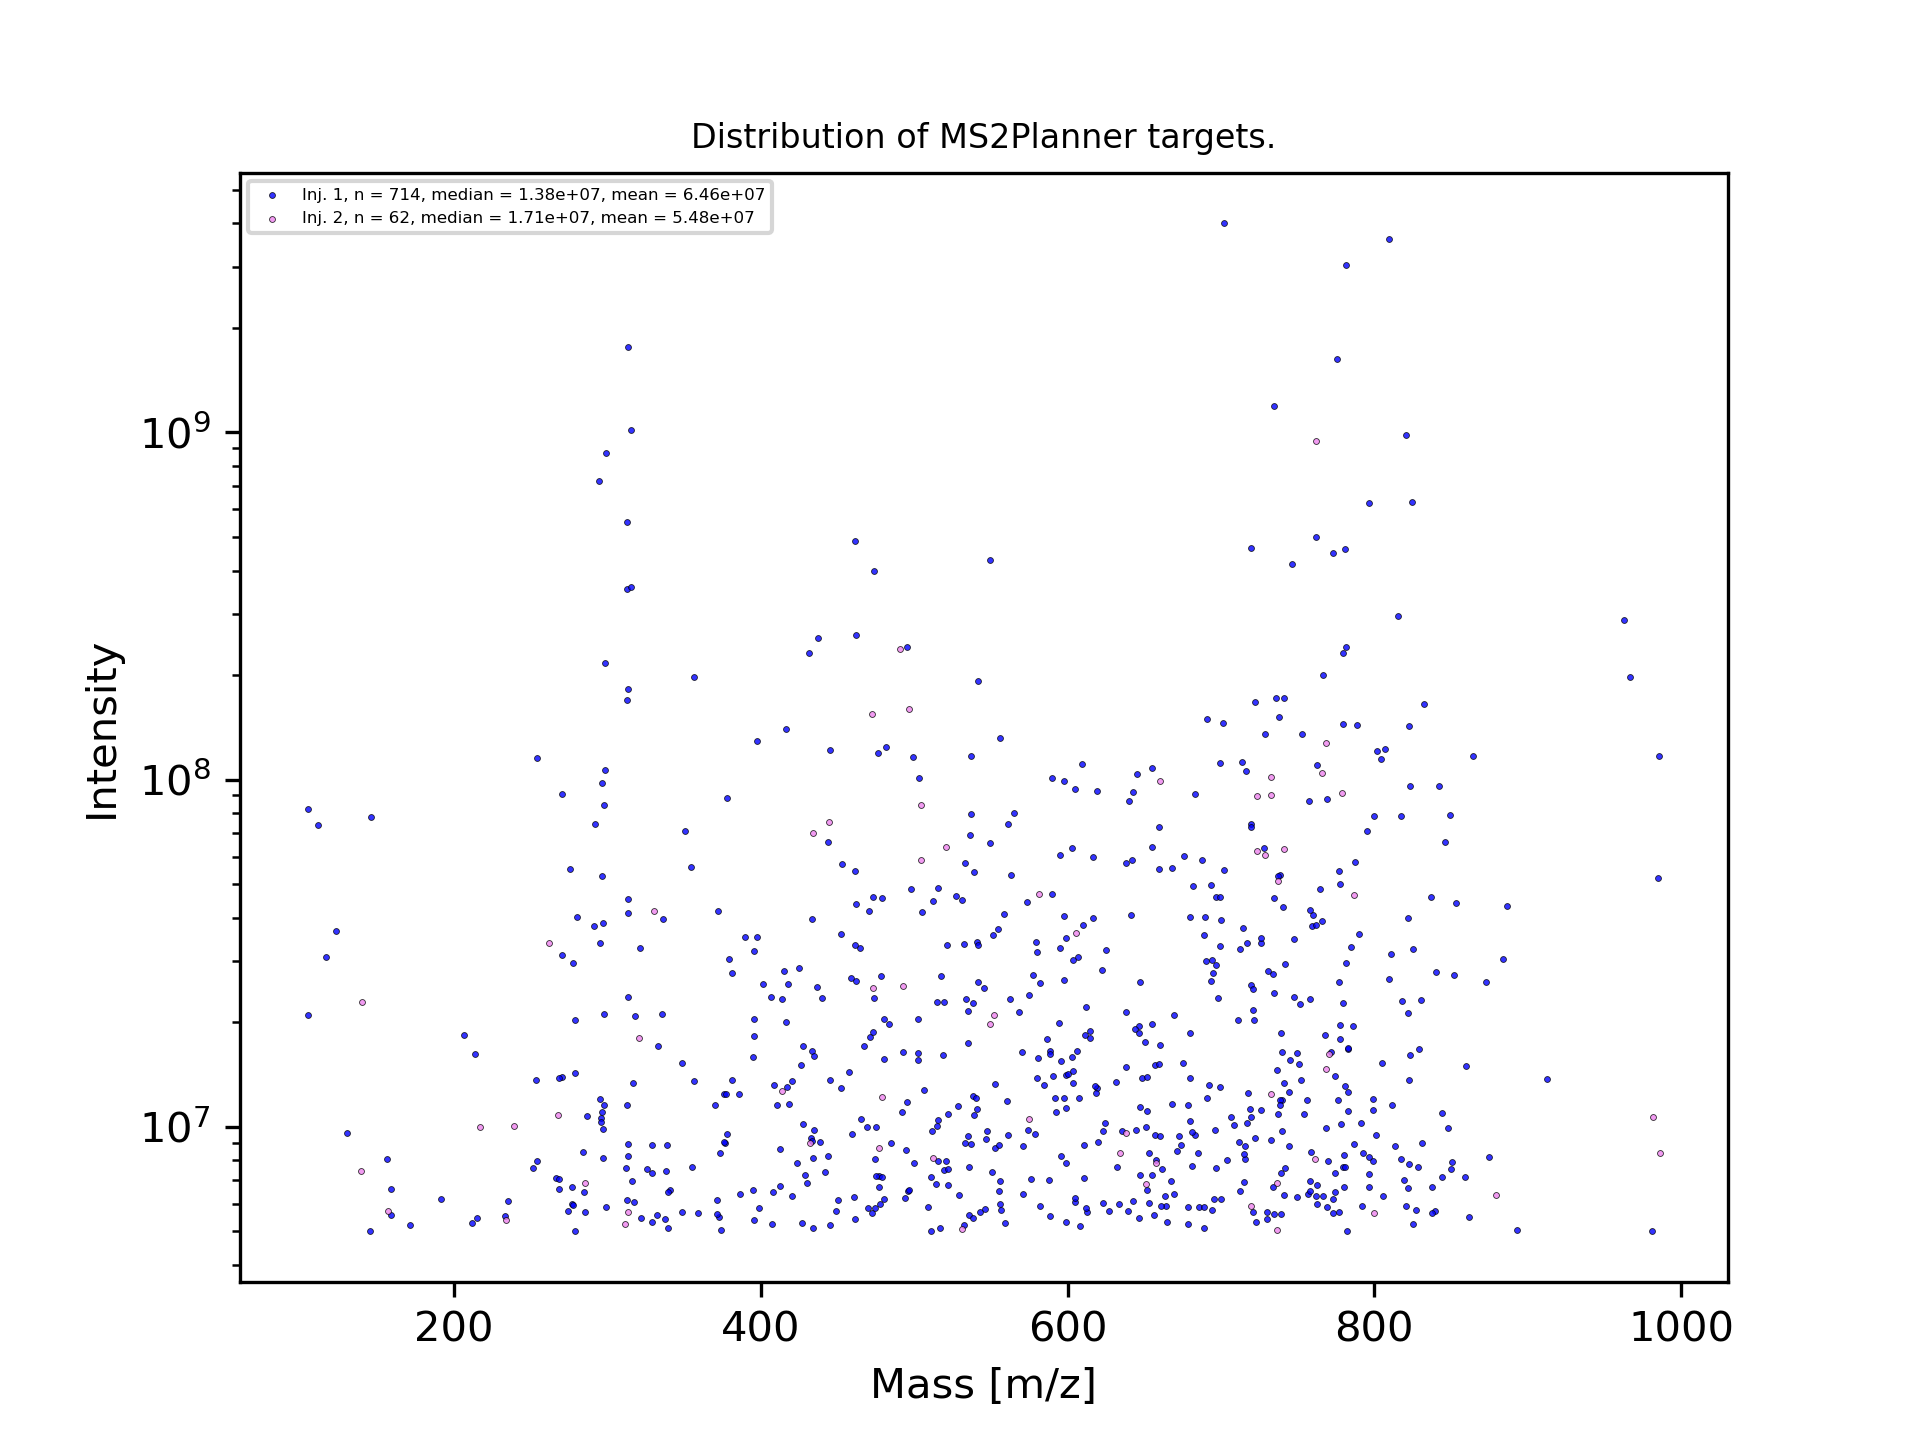

In [20]:
#### m/z | RT
filename = glob.glob('results_targeted_MS2Planner_curve/plots/*_ALL_plot_mz_int.png')
Image(filename[0])

### Download the results

Download the IODA-targeted workflow results ->
[download_results_targeted_MS2Planner_curve/IODA_MS2Planner_curve_results.zip](download_results_targeted_MS2Planner_curve/IODA_MS2Planner_curve_results.zip.zip?download=1).

### Prepare your IODA experiment
Prepare the iterative mass spectrometry acquisition. For instructions on how to load and configure an exclusion list with XCalibur or MaxQuant.Live please refer to [the following documentation](nothing).

### Step 0 - Generate an mzTab file

The mzTab file must contain results from feature detection and alignment for the two samples: the "reference" sample and the "blank' sample. Please refer to the [documentation page](link) for more information.

### Step 1 - Upload the mzTab file

##### <span style="color:brown">Method 1 - Upload your mzTab file </span>

Upload your mzML files on the Binder server with the Jupyter lab interface (drag-and-drop the file in the left panel or use the "Upload" icon). 

##### <span style="color:brown">Method 2 - Web-sharing links</span>
We support retrieving the files from the following cloud sharing services:
> **Google Drive** : copy the sharing the link (make sure the sharing setting is set to 'Anyone with the link can download').

> **MassIVE/GNPS repository** : copy the link for the file.


### Step 3 - Specify the link or path to the mzTab file

In the cell below, indicate the filename for the mzTab file. The filename must be into parenthesis,  such as: *"myfile.mzTab"*. If applicable change the path, such *"input_folder/myfile.mzTab"*.

In [ ]:
input_mzTab = 'https://drive.google.com/file/d/1NGVzhrw-xZ4nMJserIQ7v4tYgcmraZ6g/view?usp=sharing'

### Step 4 - Specify the parameters of the IODA-targeted workflow
Specify the parameter values for IODA-targeted workflow in the cell below:

*min_ratio_value*: minimum ratio for the intensity of an ion/feature (peak height) between the reference and blank samples (reference/blank). Only ions above that ratio will be valid ion targets. (Default = 5).

*min_intensity_value*: the minimum intensity (peak height) of an ion/feature in the reference sample to be considered as valid ion targets. (Default = 1E5).

*experiment_number*: define the number of iterative experiment(s) to perform for the IODA-targeted workflow. If >2, the valid target ions will be splitted into (multiple) experiments (Default = 3, range 1-10)


In [ ]:
min_ratio_value = 5
min_intensity_value = 1E5
experiment_number = 3

### Step 5 - Run the IODA-targeted workflow

Simply run the cell below to start the IODA-targeted workflow

In [ ]:
from IODA_targeted_workflow import *
make_targeted_list_from_mzTab(input_mzTab, experiment_number, min_ratio_value, min_intensity_value)

### Step 6 - Examine the results

**Visualise** : Run the cell below to show the scatter plot for the IODA-targeted workflow results. Valid targets in the reference sample are represented into experiment(s). The ion/features from the blank sample are also shown. Verify that the OpenMS parameter variables and IODA-targeted workflows are adapted to level you want to apply, and your sample(s) complexity.

- Examine the IODA-targeted worflow log and the plots in order to verify that the 'min_intensity' parameter is adapted to exclusion level you want to apply, and your sample(s) complexity.
- Note that, at this stage, it cannot be evaluated if ion detection was done optimally. This should be examinated during the generation of the mzTab file (such as with TOPPAS/OpenMS).

In [ ]:
from IPython.display import Image
Image("results_targeted/intermediate_files/experiment_blank_shared_TARGETED_RATIO_scatter_view.png")
Image("results_targeted/intermediate_files/experiment_blank_shared_TARGETED_INTENSITY_scatter_view.png")